In [35]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [36]:
path = Path('../../data/results/experiment1')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


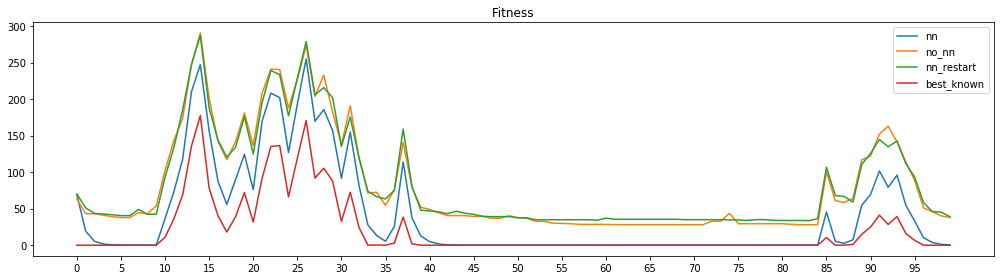

In [37]:
# fitness plots
nn = pd.read_csv(path/'nn_fitness.csv').mean(0)
no_nn = pd.read_csv(path/'no_nn_fitness.csv').mean(0)
nn_restart = pd.read_csv(path/'nn_restart_fitness.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').fitness
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([nn,no_nn,nn_restart,best_known],['nn','no_nn','nn_restart','best_known']): ax.plot(values, label=t)

ax.set_title('Fitness')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'fitness_value.eps', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


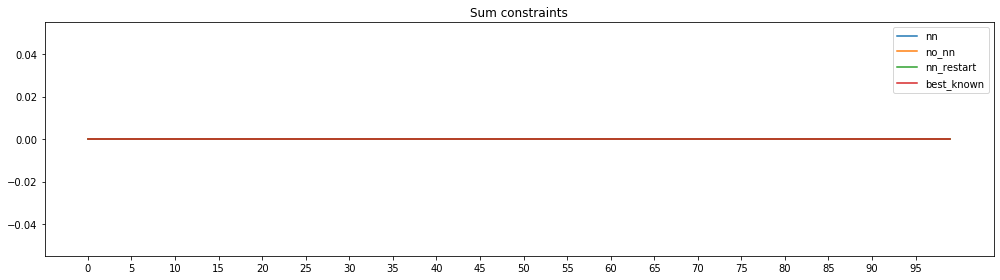

In [39]:
# constraints plots
nn = pd.read_csv(path/'nn_sumcv.csv').mean(0)
no_nn = pd.read_csv(path/'no_nn_sumcv.csv').mean(0)
nn_restart = pd.read_csv(path/'nn_restart_sumcv.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').sum_constraints
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([nn,no_nn,nn_restart,best_known],['nn','no_nn','nn_restart','best_known']): ax.plot(values, label=t)

ax.set_title('Sum constraints')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'constraints_values.eps', format='eps', dpi=1000)